# Gender Recognition from CelebA Dataset
#### - Nerses Martirosyan, Armen Minassian, Pierre Tobgui

At first we tried turning pictures into pixels and treating pixels as features using the ravel methond

In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import metrics
import sys
import numpy

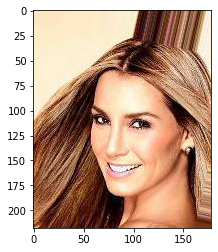

In [2]:
%matplotlib inline
image = pd.DataFrame()
path = "img_align_celeba/1.jpg"

#loading an image
image = mpimg.imread(path)
tmp_imag = plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest')

In [3]:
#loading the labels
label_df = pd.read_csv("list_attr_celeba_no_zeroes_male.csv")
label_df.set_index('image_id', inplace=True)
label_df.replace(to_replace=-1, value=0, inplace=True)
label_df.head()
#label_df['Male'].head()

,Male
image_id,
1.jpg,0
2.jpg,0
3.jpg,1
4.jpg,0
5.jpg,0


Male    1
Name: 367.jpg, dtype: int64

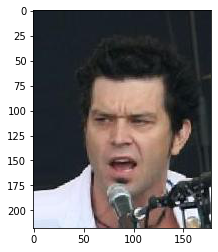

In [4]:
#Checking Images against the labels
sample_img = "img_align_celeba/367.jpg"
image = mpimg.imread(sample_img)
plt.imshow(image,cmap=plt.cm.gray,interpolation='nearest')
label_df.loc[sample_img.split('/')[-1]]

In [5]:
#flattening the images into arrays and storing them into arrays
#only using 1000 images as the dataset is too big (> 200,000 images)
images = []
for x in range(1,500):
    tmp_imag = mpimg.imread("img_align_celeba/"+ str(x) + ".jpg")
    tmp_imag = tmp_imag.ravel()
    images.append(tmp_imag)

numpy.set_printoptions(threshold=sys.maxsize)
temp_ar = images[2]
tmp_imag = mpimg.imread("img_align_celeba/3.jpg")
tmp_imag = tmp_imag.ravel()
temp_ar == tmp_imag

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [6]:
#storring the flattened images into arrays
cols = []
for x in range(116412):
        cols.append("Pixel_" + str(x) + "")
image_data=pd.DataFrame(images, columns=cols) 
image_data.head()

,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,...,Pixel_116402,Pixel_116403,Pixel_116404,Pixel_116405,Pixel_116406,Pixel_116407,Pixel_116408,Pixel_116409,Pixel_116410,Pixel_116411
0,253,231,194,253,231,194,253,231,194,253,...,20,118,49,20,120,50,24,120,50,24
1,67,52,45,65,50,43,65,50,43,67,...,97,145,104,100,139,119,112,139,119,112
2,255,255,255,255,255,255,255,255,255,255,...,96,96,91,97,94,94,96,94,94,96
3,55,46,39,111,102,95,93,86,80,97,...,91,57,56,52,32,33,28,27,28,23
4,152,197,203,152,197,203,150,198,202,149,...,201,145,199,201,149,198,202,149,198,202


In [7]:
#loading the new labels
label_df = pd.read_csv("list_attr_celeba_no_zeroes_male.csv")
label_df.replace(to_replace=-1, value=0, inplace=True)
label_df.head()

,image_id,Male
0,1.jpg,0
1,2.jpg,0
2,3.jpg,1
3,4.jpg,0
4,5.jpg,0


In [8]:
#combining labels with data
frames = [image_data, label_df['Male']]
result = pd.concat(frames,axis=1, join='inner')
result[0:10]

,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,...,Pixel_116403,Pixel_116404,Pixel_116405,Pixel_116406,Pixel_116407,Pixel_116408,Pixel_116409,Pixel_116410,Pixel_116411,Male
0,253,231,194,253,231,194,253,231,194,253,...,118,49,20,120,50,24,120,50,24,0
1,67,52,45,65,50,43,65,50,43,67,...,145,104,100,139,119,112,139,119,112,0
2,255,255,255,255,255,255,255,255,255,255,...,96,91,97,94,94,96,94,94,96,1
3,55,46,39,111,102,95,93,86,80,97,...,57,56,52,32,33,28,27,28,23,0
4,152,197,203,152,197,203,150,198,202,149,...,145,199,201,149,198,202,149,198,202,0
5,255,255,255,255,255,255,255,255,255,255,...,62,46,10,39,29,17,39,29,17,0
6,122,79,72,122,79,72,123,78,72,122,...,175,174,179,160,159,164,160,159,164,1
7,26,29,34,25,28,33,28,27,33,28,...,26,25,30,26,25,30,26,25,30,1
8,94,75,45,93,74,44,93,74,44,93,...,182,159,117,177,155,105,177,155,105,0
9,3,4,8,3,4,8,3,4,8,4,...,18,17,23,17,18,23,17,18,23,0


In [9]:
#setting uf the feature and label columns
X = result[cols]
X.head()

,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,...,Pixel_116402,Pixel_116403,Pixel_116404,Pixel_116405,Pixel_116406,Pixel_116407,Pixel_116408,Pixel_116409,Pixel_116410,Pixel_116411
0,253,231,194,253,231,194,253,231,194,253,...,20,118,49,20,120,50,24,120,50,24
1,67,52,45,65,50,43,65,50,43,67,...,97,145,104,100,139,119,112,139,119,112
2,255,255,255,255,255,255,255,255,255,255,...,96,96,91,97,94,94,96,94,94,96
3,55,46,39,111,102,95,93,86,80,97,...,91,57,56,52,32,33,28,27,28,23
4,152,197,203,152,197,203,150,198,202,149,...,201,145,199,201,149,198,202,149,198,202


In [10]:
y = result['Male']
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Male, dtype: int64

In [21]:
#spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [22]:
my_pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [23]:
#setting up SVC
my_SVM = SVC(C=1, kernel='rbf', gamma=0.0010, random_state=1)

#Training on the new training set
my_SVM.fit(X_Train_new,y_train)

#Testing on the new testing set
y_predict_svm = my_SVM.predict(X_Test_new)

score_SVM = accuracy_score(y_test,y_predict_svm)
print(score_SVM)

0.52


 After trying many different ways we were not able to achieve any progress using pixels. The machine never learned.
 
 We suspect this is because the images are not cropped at exactly the head and all the pixels around 
 the faces are interfeering with the learning. 
 We tried looking for ways to cut the pictures to only use the face first. and then run our algorithm
 but no luck. 
 
 So, instead we decided to use the features that come with these image files as a csv to train our model.
  # ------------------------------------------------------------------------------------------------------------

# Gender Recognition using Features from CelebA Dataset

### Importing Dataset:

In [38]:
df = pd.read_csv("list_attr_celeba_male.csv",nrows = 2500)
df.replace(to_replace=-1, value=0, inplace=True)

In [39]:
pd.set_option('display.max_columns',None)
df.tail()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,Male
2495,002496.jpg,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,1,1,0,0,0,1,0,1,1,0,1,0,0,1,0
2496,002497.jpg,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
2497,002498.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2498,002499.jpg,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0
2499,002500.jpg,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


### Normalizing the features

In [40]:
#seting up the feature columns
feature_cols = ['Arched_Eyebrows','Attractive','Bags_Under_Eyes','Bald','Bangs','Big_Lips','Big_Nose','Bushy_Eyebrows','Chubby','Double_Chin','Eyeglasses','Goatee','Gray_Hair','Heavy_Makeup','High_Cheekbones','Mustache','No_Beard','Oval_Face','Pale_Skin','Pointy_Nose','Receding_Hairline','Rosy_Cheeks','Sideburns','Wavy_Hair','Wearing_Earrings','Wearing_Lipstick']

#selecting above features from df
X = df[feature_cols]

#selecting the labels from df
y = df['Male']

#normalizing the features
X = preprocessing.scale(X)

### ANN with 1 hidden layer 60 neurons

In [41]:
# 1 Hidden Layer with 30 neurons:
my_ANN = MLPClassifier(hidden_layer_sizes=(60), activation= 'logistic', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.02, verbose=True, tol=0.0001)

In [42]:
# cross-validating 10 fold
accuracy_list = cross_val_score(my_ANN,X,y,cv=10,scoring='accuracy')

Iteration 1, loss = 0.50841483
Iteration 2, loss = 0.31140947
Iteration 3, loss = 0.26159037
Iteration 4, loss = 0.24769978
Iteration 5, loss = 0.23934352
Iteration 6, loss = 0.23602656
Iteration 7, loss = 0.24443822
Iteration 8, loss = 0.23487649
Iteration 9, loss = 0.23351353
Iteration 10, loss = 0.23464423
Iteration 11, loss = 0.23377334
Iteration 12, loss = 0.23618834
Iteration 13, loss = 0.23312399
Iteration 14, loss = 0.23379079
Iteration 15, loss = 0.23808419
Iteration 16, loss = 0.24206674
Iteration 17, loss = 0.23621135
Iteration 18, loss = 0.24428830
Iteration 19, loss = 0.24715112
Iteration 20, loss = 0.23762676
Iteration 21, loss = 0.23103710
Iteration 22, loss = 0.23662608
Iteration 23, loss = 0.23811294
Iteration 24, loss = 0.23217594
Iteration 25, loss = 0.23700034
Iteration 26, loss = 0.23429747
Iteration 27, loss = 0.23503952
Iteration 28, loss = 0.24429492
Iteration 29, loss = 0.23800643
Iteration 30, loss = 0.23292595
Iteration 31, loss = 0.23530196
Iteration 32, los

Iteration 28, loss = 0.23463357
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.52046505
Iteration 2, loss = 0.31668781
Iteration 3, loss = 0.26278447
Iteration 4, loss = 0.24623869
Iteration 5, loss = 0.24041873
Iteration 6, loss = 0.23898846
Iteration 7, loss = 0.23592378
Iteration 8, loss = 0.23712108
Iteration 9, loss = 0.23622465
Iteration 10, loss = 0.24080157
Iteration 11, loss = 0.24529879
Iteration 12, loss = 0.24134287
Iteration 13, loss = 0.23834417
Iteration 14, loss = 0.23866390
Iteration 15, loss = 0.23599927
Iteration 16, loss = 0.23309219
Iteration 17, loss = 0.23299744
Iteration 18, loss = 0.23350974
Iteration 19, loss = 0.23396343
Iteration 20, loss = 0.23568597
Iteration 21, loss = 0.24161729
Iteration 22, loss = 0.23816622
Iteration 23, loss = 0.23395414
Iteration 24, loss = 0.23867881
Iteration 25, loss = 0.23860469
Iteration 26, loss = 0.24164614
Iteration 27, loss = 0.23311159
Training loss did not i

In [43]:
#printing the accuracies 
print('\n', 'accuracy:', accuracy_list)


 accuracy: [0.908 0.912 0.896 0.924 0.9   0.916 0.924 0.904 0.924 0.936]


In [44]:
# finding the average accuracy
accuracy_cv = accuracy_list.mean()
print(accuracy_cv)

0.9144


### Using GridSearch to find the best neuron layout

In [45]:
# defining a range for different hidden layer neurons to be tested
neuron_number = [(i,) for i in range(5,250,5)]
neuron_number[0:5]

# creating a dictionary for grid parameter
param_grid = dict(hidden_layer_sizes = neuron_number)

#instanciating the model
my_ANN = MLPClassifier(hidden_layer_sizes=(30,), activation= 'logistic', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.02, verbose=True, tol=0.0001)
#creating the grid
grid = GridSearchCV(my_ANN, param_grid, cv=10, scoring='accuracy')

#fiting the grid
grid.fit(X,y)

# viewing the best results
print(grid.best_score_)
print(grid.best_params_)

Iteration 1, loss = 0.61372989
Iteration 2, loss = 0.46259862
Iteration 3, loss = 0.37003212
Iteration 4, loss = 0.31352952
Iteration 5, loss = 0.28448655
Iteration 6, loss = 0.26823301
Iteration 7, loss = 0.26038676
Iteration 8, loss = 0.25669123
Iteration 9, loss = 0.25211642
Iteration 10, loss = 0.24947590
Iteration 11, loss = 0.24790591
Iteration 12, loss = 0.24723395
Iteration 13, loss = 0.24601391
Iteration 14, loss = 0.24504923
Iteration 15, loss = 0.24492690
Iteration 16, loss = 0.24626985
Iteration 17, loss = 0.24479261
Iteration 18, loss = 0.24440166
Iteration 19, loss = 0.24458608
Iteration 20, loss = 0.24567903
Iteration 21, loss = 0.24436736
Iteration 22, loss = 0.24516345
Iteration 23, loss = 0.24458432
Iteration 24, loss = 0.24370751
Iteration 25, loss = 0.24353833
Iteration 26, loss = 0.24433001
Iteration 27, loss = 0.24405937
Iteration 28, loss = 0.24443303
Iteration 29, loss = 0.24552041
Iteration 30, loss = 0.24636647
Iteration 31, loss = 0.24513288
Iteration 32, los

Iteration 26, loss = 0.24523456
Iteration 27, loss = 0.24774854
Iteration 28, loss = 0.24498421
Iteration 29, loss = 0.24567546
Iteration 30, loss = 0.24487428
Iteration 31, loss = 0.24535005
Iteration 32, loss = 0.24364185
Iteration 33, loss = 0.24508987
Iteration 34, loss = 0.24479899
Iteration 35, loss = 0.24454060
Iteration 36, loss = 0.24696370
Iteration 37, loss = 0.24931765
Iteration 38, loss = 0.24640275
Iteration 39, loss = 0.24451400
Iteration 40, loss = 0.24532491
Iteration 41, loss = 0.24437309
Iteration 42, loss = 0.24443830
Iteration 43, loss = 0.24507492
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.61233184
Iteration 2, loss = 0.46167564
Iteration 3, loss = 0.36767371
Iteration 4, loss = 0.31357848
Iteration 5, loss = 0.28414860
Iteration 6, loss = 0.26796223
Iteration 7, loss = 0.26009798
Iteration 8, loss = 0.25749358
Iteration 9, loss = 0.25237360
Iteration 10, loss = 0.25230589
Iteration 11, loss = 0.

Iteration 1, loss = 0.58953265
Iteration 2, loss = 0.38036110
Iteration 3, loss = 0.29399228
Iteration 4, loss = 0.26151388
Iteration 5, loss = 0.24692102
Iteration 6, loss = 0.24052501
Iteration 7, loss = 0.23824697
Iteration 8, loss = 0.23685920
Iteration 9, loss = 0.23631055
Iteration 10, loss = 0.23473430
Iteration 11, loss = 0.23384598
Iteration 12, loss = 0.23796871
Iteration 13, loss = 0.23487025
Iteration 14, loss = 0.23337613
Iteration 15, loss = 0.23448498
Iteration 16, loss = 0.23392960
Iteration 17, loss = 0.23461241
Iteration 18, loss = 0.23413059
Iteration 19, loss = 0.23321153
Iteration 20, loss = 0.23827559
Iteration 21, loss = 0.23338756
Iteration 22, loss = 0.23304639
Iteration 23, loss = 0.23355376
Iteration 24, loss = 0.23336469
Iteration 25, loss = 0.23266971
Iteration 26, loss = 0.23428553
Iteration 27, loss = 0.23336148
Iteration 28, loss = 0.23429863
Iteration 29, loss = 0.23246355
Iteration 30, loss = 0.23352630
Iteration 31, loss = 0.23294970
Iteration 32, los

Iteration 13, loss = 0.23368000
Iteration 14, loss = 0.23266776
Iteration 15, loss = 0.23283203
Iteration 16, loss = 0.23451938
Iteration 17, loss = 0.23431829
Iteration 18, loss = 0.23399031
Iteration 19, loss = 0.23502049
Iteration 20, loss = 0.23833600
Iteration 21, loss = 0.23363290
Iteration 22, loss = 0.23704926
Iteration 23, loss = 0.23431024
Iteration 24, loss = 0.23454439
Iteration 25, loss = 0.23355295
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.55120617
Iteration 2, loss = 0.33800982
Iteration 3, loss = 0.27065626
Iteration 4, loss = 0.24343161
Iteration 5, loss = 0.23571342
Iteration 6, loss = 0.23252838
Iteration 7, loss = 0.23251879
Iteration 8, loss = 0.23215743
Iteration 9, loss = 0.23232555
Iteration 10, loss = 0.22991898
Iteration 11, loss = 0.23100020
Iteration 12, loss = 0.23165228
Iteration 13, loss = 0.23180903
Iteration 14, loss = 0.22980128
Iteration 15, loss = 0.22880007
Iteration 16, loss = 0.

Iteration 1, loss = 0.53302382
Iteration 2, loss = 0.31938559
Iteration 3, loss = 0.26103746
Iteration 4, loss = 0.24289938
Iteration 5, loss = 0.23905244
Iteration 6, loss = 0.23664843
Iteration 7, loss = 0.23582282
Iteration 8, loss = 0.23651285
Iteration 9, loss = 0.23363748
Iteration 10, loss = 0.23472929
Iteration 11, loss = 0.23400288
Iteration 12, loss = 0.23303013
Iteration 13, loss = 0.23604415
Iteration 14, loss = 0.23447972
Iteration 15, loss = 0.23388078
Iteration 16, loss = 0.23497634
Iteration 17, loss = 0.23386667
Iteration 18, loss = 0.23416423
Iteration 19, loss = 0.23635134
Iteration 20, loss = 0.23525958
Iteration 21, loss = 0.23399567
Iteration 22, loss = 0.23283940
Iteration 23, loss = 0.23418159
Iteration 24, loss = 0.23345081
Iteration 25, loss = 0.23413185
Iteration 26, loss = 0.23552812
Iteration 27, loss = 0.23409399
Iteration 28, loss = 0.23252116
Iteration 29, loss = 0.23480160
Iteration 30, loss = 0.23465654
Iteration 31, loss = 0.23501990
Iteration 32, los

Iteration 27, loss = 0.23426930
Iteration 28, loss = 0.23328267
Iteration 29, loss = 0.23295437
Iteration 30, loss = 0.23443613
Iteration 31, loss = 0.23177383
Iteration 32, loss = 0.23318850
Iteration 33, loss = 0.23335274
Iteration 34, loss = 0.23224021
Iteration 35, loss = 0.23301024
Iteration 36, loss = 0.23519799
Iteration 37, loss = 0.23224077
Iteration 38, loss = 0.23427433
Iteration 39, loss = 0.23314801
Iteration 40, loss = 0.23408776
Iteration 41, loss = 0.23621187
Iteration 42, loss = 0.23666175
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.53998428
Iteration 2, loss = 0.32437277
Iteration 3, loss = 0.26503453
Iteration 4, loss = 0.24512928
Iteration 5, loss = 0.23875912
Iteration 6, loss = 0.23730660
Iteration 7, loss = 0.23615869
Iteration 8, loss = 0.23342877
Iteration 9, loss = 0.23493638
Iteration 10, loss = 0.23479355
Iteration 11, loss = 0.23496362
Iteration 12, loss = 0.23602126
Iteration 13, loss = 0.

Iteration 22, loss = 0.24527094
Iteration 23, loss = 0.24127742
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.51052186
Iteration 2, loss = 0.31323226
Iteration 3, loss = 0.26164398
Iteration 4, loss = 0.25050005
Iteration 5, loss = 0.23941155
Iteration 6, loss = 0.23535110
Iteration 7, loss = 0.23440050
Iteration 8, loss = 0.23452244
Iteration 9, loss = 0.23496340
Iteration 10, loss = 0.23395770
Iteration 11, loss = 0.23625941
Iteration 12, loss = 0.23353550
Iteration 13, loss = 0.23609863
Iteration 14, loss = 0.24011613
Iteration 15, loss = 0.24161865
Iteration 16, loss = 0.23548564
Iteration 17, loss = 0.23517452
Iteration 18, loss = 0.23490272
Iteration 19, loss = 0.23426097
Iteration 20, loss = 0.23670951
Iteration 21, loss = 0.23578513
Iteration 22, loss = 0.23752935
Iteration 23, loss = 0.23911288
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.5072015

Iteration 12, loss = 0.23574522
Iteration 13, loss = 0.24055811
Iteration 14, loss = 0.24311132
Iteration 15, loss = 0.24392478
Iteration 16, loss = 0.23304223
Iteration 17, loss = 0.23384411
Iteration 18, loss = 0.23236638
Iteration 19, loss = 0.23249116
Iteration 20, loss = 0.23422980
Iteration 21, loss = 0.23254885
Iteration 22, loss = 0.23548408
Iteration 23, loss = 0.23753450
Iteration 24, loss = 0.23476227
Iteration 25, loss = 0.23490692
Iteration 26, loss = 0.23768695
Iteration 27, loss = 0.23501194
Iteration 28, loss = 0.23181082
Iteration 29, loss = 0.23321106
Iteration 30, loss = 0.23262201
Iteration 31, loss = 0.23402803
Iteration 32, loss = 0.23417522
Iteration 33, loss = 0.23645850
Iteration 34, loss = 0.23483486
Iteration 35, loss = 0.23187499
Iteration 36, loss = 0.23525901
Iteration 37, loss = 0.23490174
Iteration 38, loss = 0.24312847
Iteration 39, loss = 0.23140095
Iteration 40, loss = 0.23396749
Iteration 41, loss = 0.23406973
Iteration 42, loss = 0.23587770
Iteratio

Iteration 8, loss = 0.24470437
Iteration 9, loss = 0.23531315
Iteration 10, loss = 0.23312180
Iteration 11, loss = 0.23458591
Iteration 12, loss = 0.23556606
Iteration 13, loss = 0.23214489
Iteration 14, loss = 0.23228574
Iteration 15, loss = 0.23515188
Iteration 16, loss = 0.23303933
Iteration 17, loss = 0.23428531
Iteration 18, loss = 0.23261768
Iteration 19, loss = 0.23314940
Iteration 20, loss = 0.23285012
Iteration 21, loss = 0.23287190
Iteration 22, loss = 0.23469623
Iteration 23, loss = 0.23245829
Iteration 24, loss = 0.23661075
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.46438201
Iteration 2, loss = 0.28270022
Iteration 3, loss = 0.25071339
Iteration 4, loss = 0.23719065
Iteration 5, loss = 0.23778827
Iteration 6, loss = 0.23376832
Iteration 7, loss = 0.23575004
Iteration 8, loss = 0.23910259
Iteration 9, loss = 0.23726341
Iteration 10, loss = 0.23618893
Iteration 11, loss = 0.23439849
Iteration 12, loss = 0.23

Iteration 5, loss = 0.23419362
Iteration 6, loss = 0.23455310
Iteration 7, loss = 0.23460511
Iteration 8, loss = 0.23776925
Iteration 9, loss = 0.24269027
Iteration 10, loss = 0.23809865
Iteration 11, loss = 0.23576672
Iteration 12, loss = 0.24043716
Iteration 13, loss = 0.23710724
Iteration 14, loss = 0.23332909
Iteration 15, loss = 0.23576701
Iteration 16, loss = 0.23993946
Iteration 17, loss = 0.23586382
Iteration 18, loss = 0.24002255
Iteration 19, loss = 0.23639223
Iteration 20, loss = 0.23931065
Iteration 21, loss = 0.23795240
Iteration 22, loss = 0.23413301
Iteration 23, loss = 0.23510752
Iteration 24, loss = 0.23724484
Iteration 25, loss = 0.23773411
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.48430865
Iteration 2, loss = 0.29149469
Iteration 3, loss = 0.25273355
Iteration 4, loss = 0.24174468
Iteration 5, loss = 0.23527644
Iteration 6, loss = 0.23437916
Iteration 7, loss = 0.23506141
Iteration 8, loss = 0.2384

Iteration 18, loss = 0.23481327
Iteration 19, loss = 0.23968029
Iteration 20, loss = 0.24048265
Iteration 21, loss = 0.24051344
Iteration 22, loss = 0.23620229
Iteration 23, loss = 0.23426069
Iteration 24, loss = 0.23831788
Iteration 25, loss = 0.23838795
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.46803637
Iteration 2, loss = 0.28647896
Iteration 3, loss = 0.24798196
Iteration 4, loss = 0.23850420
Iteration 5, loss = 0.23678025
Iteration 6, loss = 0.23630096
Iteration 7, loss = 0.23873090
Iteration 8, loss = 0.23863397
Iteration 9, loss = 0.24693563
Iteration 10, loss = 0.24167245
Iteration 11, loss = 0.23423939
Iteration 12, loss = 0.23927775
Iteration 13, loss = 0.24588074
Iteration 14, loss = 0.23622884
Iteration 15, loss = 0.23742831
Iteration 16, loss = 0.23612945
Iteration 17, loss = 0.23455420
Iteration 18, loss = 0.23440855
Iteration 19, loss = 0.23465569
Iteration 20, loss = 0.23932213
Iteration 21, loss = 0.

Iteration 16, loss = 0.23075361
Iteration 17, loss = 0.23176354
Iteration 18, loss = 0.23298260
Iteration 19, loss = 0.23333259
Iteration 20, loss = 0.23000653
Iteration 21, loss = 0.23383010
Iteration 22, loss = 0.23169866
Iteration 23, loss = 0.23289207
Iteration 24, loss = 0.23066953
Iteration 25, loss = 0.23257173
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.46962191
Iteration 2, loss = 0.29734970
Iteration 3, loss = 0.25474408
Iteration 4, loss = 0.24634438
Iteration 5, loss = 0.23899935
Iteration 6, loss = 0.23810143
Iteration 7, loss = 0.23678072
Iteration 8, loss = 0.23397210
Iteration 9, loss = 0.23553804
Iteration 10, loss = 0.23824672
Iteration 11, loss = 0.24428428
Iteration 12, loss = 0.24731362
Iteration 13, loss = 0.23869396
Iteration 14, loss = 0.23640399
Iteration 15, loss = 0.23771544
Iteration 16, loss = 0.23679954
Iteration 17, loss = 0.23659883
Iteration 18, loss = 0.24318264
Iteration 19, loss = 0.

Iteration 20, loss = 0.23463701
Iteration 21, loss = 0.23093377
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.45128469
Iteration 2, loss = 0.28744141
Iteration 3, loss = 0.25190747
Iteration 4, loss = 0.24474034
Iteration 5, loss = 0.23879352
Iteration 6, loss = 0.23708764
Iteration 7, loss = 0.23671373
Iteration 8, loss = 0.23461380
Iteration 9, loss = 0.23703867
Iteration 10, loss = 0.23310727
Iteration 11, loss = 0.23546534
Iteration 12, loss = 0.23515546
Iteration 13, loss = 0.23774738
Iteration 14, loss = 0.23850580
Iteration 15, loss = 0.24070372
Iteration 16, loss = 0.24081067
Iteration 17, loss = 0.23740696
Iteration 18, loss = 0.23543284
Iteration 19, loss = 0.23804636
Iteration 20, loss = 0.23974590
Iteration 21, loss = 0.23737482
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.44462867
Iteration 2, loss = 0.28384957
Iteration 3, loss = 0.25219436


Iteration 19, loss = 0.24123727
Iteration 20, loss = 0.23786383
Iteration 21, loss = 0.23632955
Iteration 22, loss = 0.23503375
Iteration 23, loss = 0.23462970
Iteration 24, loss = 0.23448859
Iteration 25, loss = 0.23951122
Iteration 26, loss = 0.24145830
Iteration 27, loss = 0.24407228
Iteration 28, loss = 0.23802281
Iteration 29, loss = 0.23525658
Iteration 30, loss = 0.23575150
Iteration 31, loss = 0.23382165
Iteration 32, loss = 0.23361829
Iteration 33, loss = 0.23712912
Iteration 34, loss = 0.23933783
Iteration 35, loss = 0.24127829
Iteration 36, loss = 0.23788563
Iteration 37, loss = 0.24111568
Iteration 38, loss = 0.23745084
Iteration 39, loss = 0.23328208
Iteration 40, loss = 0.23708975
Iteration 41, loss = 0.23797633
Iteration 42, loss = 0.23661519
Iteration 43, loss = 0.24154211
Iteration 44, loss = 0.24134085
Iteration 45, loss = 0.24016437
Iteration 46, loss = 0.23557822
Iteration 47, loss = 0.24236127
Iteration 48, loss = 0.23489467
Iteration 49, loss = 0.23470271
Iteratio

Iteration 3, loss = 0.25231098
Iteration 4, loss = 0.24362737
Iteration 5, loss = 0.23585279
Iteration 6, loss = 0.23157463
Iteration 7, loss = 0.23061016
Iteration 8, loss = 0.23166053
Iteration 9, loss = 0.23193336
Iteration 10, loss = 0.23914357
Iteration 11, loss = 0.23291055
Iteration 12, loss = 0.23086125
Iteration 13, loss = 0.23040657
Iteration 14, loss = 0.23146525
Iteration 15, loss = 0.23003975
Iteration 16, loss = 0.23040993
Iteration 17, loss = 0.23051271
Iteration 18, loss = 0.22939750
Iteration 19, loss = 0.23309168
Iteration 20, loss = 0.23250673
Iteration 21, loss = 0.23208836
Iteration 22, loss = 0.22940445
Iteration 23, loss = 0.22934205
Iteration 24, loss = 0.23010201
Iteration 25, loss = 0.22724556
Iteration 26, loss = 0.23249157
Iteration 27, loss = 0.22921135
Iteration 28, loss = 0.22849007
Iteration 29, loss = 0.23141674
Iteration 30, loss = 0.23513997
Iteration 31, loss = 0.23344150
Iteration 32, loss = 0.23034625
Iteration 33, loss = 0.23044641
Iteration 34, l

Iteration 23, loss = 0.23504020
Iteration 24, loss = 0.24029780
Iteration 25, loss = 0.23798555
Iteration 26, loss = 0.23781350
Iteration 27, loss = 0.23349771
Iteration 28, loss = 0.23341215
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.45478630
Iteration 2, loss = 0.28319911
Iteration 3, loss = 0.25095322
Iteration 4, loss = 0.23922371
Iteration 5, loss = 0.24100142
Iteration 6, loss = 0.23923353
Iteration 7, loss = 0.23882831
Iteration 8, loss = 0.23550260
Iteration 9, loss = 0.23373923
Iteration 10, loss = 0.24092050
Iteration 11, loss = 0.23313926
Iteration 12, loss = 0.24982724
Iteration 13, loss = 0.24743137
Iteration 14, loss = 0.25279665
Iteration 15, loss = 0.23498375
Iteration 16, loss = 0.23423136
Iteration 17, loss = 0.23417605
Iteration 18, loss = 0.23498610
Iteration 19, loss = 0.24238580
Iteration 20, loss = 0.23587901
Iteration 21, loss = 0.23468368
Iteration 22, loss = 0.23273346
Iteration 23, loss = 0.

Iteration 29, loss = 0.24238663
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.44601927
Iteration 2, loss = 0.28383113
Iteration 3, loss = 0.25165679
Iteration 4, loss = 0.24037153
Iteration 5, loss = 0.23563471
Iteration 6, loss = 0.23701097
Iteration 7, loss = 0.23437480
Iteration 8, loss = 0.23842322
Iteration 9, loss = 0.23987006
Iteration 10, loss = 0.23724970
Iteration 11, loss = 0.23747834
Iteration 12, loss = 0.24495255
Iteration 13, loss = 0.24239772
Iteration 14, loss = 0.23485562
Iteration 15, loss = 0.23775982
Iteration 16, loss = 0.24389564
Iteration 17, loss = 0.23521933
Iteration 18, loss = 0.23343910
Iteration 19, loss = 0.23669226
Iteration 20, loss = 0.25260249
Iteration 21, loss = 0.24041278
Iteration 22, loss = 0.23848334
Iteration 23, loss = 0.23805601
Iteration 24, loss = 0.23613137
Iteration 25, loss = 0.24329311
Iteration 26, loss = 0.23454648
Iteration 27, loss = 0.23214573
Iteration 28, loss = 0.

Iteration 2, loss = 0.29685802
Iteration 3, loss = 0.25795780
Iteration 4, loss = 0.24308431
Iteration 5, loss = 0.23843824
Iteration 6, loss = 0.23551632
Iteration 7, loss = 0.23490501
Iteration 8, loss = 0.23661154
Iteration 9, loss = 0.23723624
Iteration 10, loss = 0.23377585
Iteration 11, loss = 0.24007480
Iteration 12, loss = 0.24755811
Iteration 13, loss = 0.23497279
Iteration 14, loss = 0.23704198
Iteration 15, loss = 0.23693636
Iteration 16, loss = 0.23788368
Iteration 17, loss = 0.23703525
Iteration 18, loss = 0.23801919
Iteration 19, loss = 0.23780806
Iteration 20, loss = 0.23255997
Iteration 21, loss = 0.23487104
Iteration 22, loss = 0.23623951
Iteration 23, loss = 0.24259983
Iteration 24, loss = 0.24181916
Iteration 25, loss = 0.23472875
Iteration 26, loss = 0.23244192
Iteration 27, loss = 0.23326355
Iteration 28, loss = 0.23613726
Iteration 29, loss = 0.24153000
Iteration 30, loss = 0.23771321
Iteration 31, loss = 0.23477332
Iteration 32, loss = 0.24119978
Iteration 33, lo

Iteration 1, loss = 0.42409263
Iteration 2, loss = 0.27842188
Iteration 3, loss = 0.24668016
Iteration 4, loss = 0.23899773
Iteration 5, loss = 0.23672652
Iteration 6, loss = 0.24368456
Iteration 7, loss = 0.24696622
Iteration 8, loss = 0.23494040
Iteration 9, loss = 0.23665628
Iteration 10, loss = 0.23791310
Iteration 11, loss = 0.23485423
Iteration 12, loss = 0.23315565
Iteration 13, loss = 0.23750874
Iteration 14, loss = 0.23651150
Iteration 15, loss = 0.23761794
Iteration 16, loss = 0.24196872
Iteration 17, loss = 0.23511532
Iteration 18, loss = 0.23773070
Iteration 19, loss = 0.23480711
Iteration 20, loss = 0.23598372
Iteration 21, loss = 0.24297592
Iteration 22, loss = 0.23834310
Iteration 23, loss = 0.23607895
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.43579533
Iteration 2, loss = 0.28395259
Iteration 3, loss = 0.24325390
Iteration 4, loss = 0.23798705
Iteration 5, loss = 0.23442364
Iteration 6, loss = 0.245530

Iteration 14, loss = 0.23651864
Iteration 15, loss = 0.23792095
Iteration 16, loss = 0.23745496
Iteration 17, loss = 0.23785791
Iteration 18, loss = 0.24228585
Iteration 19, loss = 0.23930407
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.45894987
Iteration 2, loss = 0.29126191
Iteration 3, loss = 0.25937740
Iteration 4, loss = 0.24392507
Iteration 5, loss = 0.24434653
Iteration 6, loss = 0.23804825
Iteration 7, loss = 0.23586280
Iteration 8, loss = 0.23599722
Iteration 9, loss = 0.23582913
Iteration 10, loss = 0.23592550
Iteration 11, loss = 0.23645177
Iteration 12, loss = 0.23393867
Iteration 13, loss = 0.23800231
Iteration 14, loss = 0.23560832
Iteration 15, loss = 0.23764280
Iteration 16, loss = 0.23867022
Iteration 17, loss = 0.23958763
Iteration 18, loss = 0.24160588
Iteration 19, loss = 0.24096408
Iteration 20, loss = 0.23838203
Iteration 21, loss = 0.23748205
Iteration 22, loss = 0.25461362
Iteration 23, loss = 0.

Iteration 4, loss = 0.24921274
Iteration 5, loss = 0.24827585
Iteration 6, loss = 0.23946053
Iteration 7, loss = 0.23782335
Iteration 8, loss = 0.23421575
Iteration 9, loss = 0.23485166
Iteration 10, loss = 0.24148606
Iteration 11, loss = 0.24437812
Iteration 12, loss = 0.24098581
Iteration 13, loss = 0.24882101
Iteration 14, loss = 0.23955200
Iteration 15, loss = 0.23977537
Iteration 16, loss = 0.23928616
Iteration 17, loss = 0.23752167
Iteration 18, loss = 0.23687941
Iteration 19, loss = 0.24351276
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.42403245
Iteration 2, loss = 0.27087794
Iteration 3, loss = 0.26008872
Iteration 4, loss = 0.24587975
Iteration 5, loss = 0.24434009
Iteration 6, loss = 0.23798945
Iteration 7, loss = 0.23721006
Iteration 8, loss = 0.23130284
Iteration 9, loss = 0.23295174
Iteration 10, loss = 0.24189836
Iteration 11, loss = 0.24184610
Iteration 12, loss = 0.23735234
Iteration 13, loss = 0.241587

Iteration 4, loss = 0.24429220
Iteration 5, loss = 0.23764507
Iteration 6, loss = 0.23512985
Iteration 7, loss = 0.23758603
Iteration 8, loss = 0.23651208
Iteration 9, loss = 0.24116886
Iteration 10, loss = 0.23725337
Iteration 11, loss = 0.23685909
Iteration 12, loss = 0.23643667
Iteration 13, loss = 0.23596997
Iteration 14, loss = 0.23979456
Iteration 15, loss = 0.23698703
Iteration 16, loss = 0.23775203
Iteration 17, loss = 0.23616821
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.47465142
Iteration 2, loss = 0.29591615
Iteration 3, loss = 0.25581781
Iteration 4, loss = 0.24499734
Iteration 5, loss = 0.23719795
Iteration 6, loss = 0.23722444
Iteration 7, loss = 0.23971892
Iteration 8, loss = 0.23996143
Iteration 9, loss = 0.23910639
Iteration 10, loss = 0.23444108
Iteration 11, loss = 0.23852704
Iteration 12, loss = 0.23915638
Iteration 13, loss = 0.23718266
Iteration 14, loss = 0.23673806
Iteration 15, loss = 0.236564

Iteration 2, loss = 0.30556244
Iteration 3, loss = 0.25816145
Iteration 4, loss = 0.25192196
Iteration 5, loss = 0.24224747
Iteration 6, loss = 0.23816687
Iteration 7, loss = 0.23857740
Iteration 8, loss = 0.24142054
Iteration 9, loss = 0.23445282
Iteration 10, loss = 0.24297719
Iteration 11, loss = 0.23944075
Iteration 12, loss = 0.23547440
Iteration 13, loss = 0.24345134
Iteration 14, loss = 0.24504712
Iteration 15, loss = 0.24030879
Iteration 16, loss = 0.23895690
Iteration 17, loss = 0.23775508
Iteration 18, loss = 0.23456811
Iteration 19, loss = 0.23684630
Iteration 20, loss = 0.23546391
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.47225884
Iteration 2, loss = 0.30514370
Iteration 3, loss = 0.25974836
Iteration 4, loss = 0.25335118
Iteration 5, loss = 0.24624213
Iteration 6, loss = 0.24287123
Iteration 7, loss = 0.24071909
Iteration 8, loss = 0.24276122
Iteration 9, loss = 0.24130871
Iteration 10, loss = 0.24699298

Iteration 25, loss = 0.24318650
Iteration 26, loss = 0.24049620
Iteration 27, loss = 0.23972078
Iteration 28, loss = 0.24435134
Iteration 29, loss = 0.23954002
Iteration 30, loss = 0.23990262
Iteration 31, loss = 0.24492998
Iteration 32, loss = 0.23788022
Iteration 33, loss = 0.23834133
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.47083037
Iteration 2, loss = 0.30235913
Iteration 3, loss = 0.25879693
Iteration 4, loss = 0.24731192
Iteration 5, loss = 0.24850650
Iteration 6, loss = 0.24973099
Iteration 7, loss = 0.24711243
Iteration 8, loss = 0.24820976
Iteration 9, loss = 0.24269717
Iteration 10, loss = 0.24659724
Iteration 11, loss = 0.24822554
Iteration 12, loss = 0.23873793
Iteration 13, loss = 0.23872972
Iteration 14, loss = 0.26730442
Iteration 15, loss = 0.23931991
Iteration 16, loss = 0.23853301
Iteration 17, loss = 0.23792981
Iteration 18, loss = 0.23791696
Iteration 19, loss = 0.23967136
Iteration 20, loss = 0.

Iteration 3, loss = 0.24837581
Iteration 4, loss = 0.24783402
Iteration 5, loss = 0.23703080
Iteration 6, loss = 0.23997516
Iteration 7, loss = 0.23463671
Iteration 8, loss = 0.23239071
Iteration 9, loss = 0.23507837
Iteration 10, loss = 0.23766860
Iteration 11, loss = 0.22981548
Iteration 12, loss = 0.24364924
Iteration 13, loss = 0.23852887
Iteration 14, loss = 0.23048099
Iteration 15, loss = 0.23031908
Iteration 16, loss = 0.23133422
Iteration 17, loss = 0.23289023
Iteration 18, loss = 0.23604552
Iteration 19, loss = 0.24224911
Iteration 20, loss = 0.24343411
Iteration 21, loss = 0.23001768
Iteration 22, loss = 0.23148133
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.45012399
Iteration 2, loss = 0.29269794
Iteration 3, loss = 0.25476538
Iteration 4, loss = 0.25123757
Iteration 5, loss = 0.23877769
Iteration 6, loss = 0.24155470
Iteration 7, loss = 0.23808291
Iteration 8, loss = 0.23903160
Iteration 9, loss = 0.2428900

Iteration 23, loss = 0.23288517
Iteration 24, loss = 0.24275224
Iteration 25, loss = 0.23242071
Iteration 26, loss = 0.23597573
Iteration 27, loss = 0.23796647
Iteration 28, loss = 0.24526430
Iteration 29, loss = 0.23647021
Iteration 30, loss = 0.24010090
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.50102236
Iteration 2, loss = 0.30993648
Iteration 3, loss = 0.27015638
Iteration 4, loss = 0.25215902
Iteration 5, loss = 0.24599987
Iteration 6, loss = 0.24316365
Iteration 7, loss = 0.24003425
Iteration 8, loss = 0.23970603
Iteration 9, loss = 0.23885369
Iteration 10, loss = 0.24050239
Iteration 11, loss = 0.24429995
Iteration 12, loss = 0.23702168
Iteration 13, loss = 0.24164742
Iteration 14, loss = 0.23937014
Iteration 15, loss = 0.24787907
Iteration 16, loss = 0.24045025
Iteration 17, loss = 0.24331312
Iteration 18, loss = 0.24017561
Iteration 19, loss = 0.23578230
Iteration 20, loss = 0.23464551
Iteration 21, loss = 0.

Iteration 31, loss = 0.23537905
Iteration 32, loss = 0.23648151
Iteration 33, loss = 0.24187622
Iteration 34, loss = 0.24557759
Iteration 35, loss = 0.24088838
Iteration 36, loss = 0.24031412
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.47798243
Iteration 2, loss = 0.30956084
Iteration 3, loss = 0.26283299
Iteration 4, loss = 0.24727075
Iteration 5, loss = 0.24005570
Iteration 6, loss = 0.24126738
Iteration 7, loss = 0.24769204
Iteration 8, loss = 0.24221327
Iteration 9, loss = 0.24325520
Iteration 10, loss = 0.23910514
Iteration 11, loss = 0.23920790
Iteration 12, loss = 0.23940645
Iteration 13, loss = 0.24638121
Iteration 14, loss = 0.24076389
Iteration 15, loss = 0.23787544
Iteration 16, loss = 0.23932635
Iteration 17, loss = 0.23849383
Iteration 18, loss = 0.23916409
Iteration 19, loss = 0.24547283
Iteration 20, loss = 0.23997162
Iteration 21, loss = 0.23529696
Iteration 22, loss = 0.23476427
Iteration 23, loss = 0.

Iteration 14, loss = 0.24809039
Iteration 15, loss = 0.24300139
Iteration 16, loss = 0.25141057
Iteration 17, loss = 0.23296199
Iteration 18, loss = 0.23884513
Iteration 19, loss = 0.24118128
Iteration 20, loss = 0.23612332
Iteration 21, loss = 0.23899717
Iteration 22, loss = 0.24780151
Iteration 23, loss = 0.23886066
Iteration 24, loss = 0.23847900
Iteration 25, loss = 0.24101407
Iteration 26, loss = 0.24041405
Iteration 27, loss = 0.25141519
Iteration 28, loss = 0.23802344
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.47726123
Iteration 2, loss = 0.29869075
Iteration 3, loss = 0.25999838
Iteration 4, loss = 0.24870280
Iteration 5, loss = 0.24185606
Iteration 6, loss = 0.23899448
Iteration 7, loss = 0.24642969
Iteration 8, loss = 0.24450504
Iteration 9, loss = 0.25377140
Iteration 10, loss = 0.24138068
Iteration 11, loss = 0.23696038
Iteration 12, loss = 0.23562389
Iteration 13, loss = 0.23590792
Iteration 14, loss = 0.

Iteration 1, loss = 0.49280817
Iteration 2, loss = 0.31257058
Iteration 3, loss = 0.26300163
Iteration 4, loss = 0.24911674
Iteration 5, loss = 0.24993326
Iteration 6, loss = 0.24092452
Iteration 7, loss = 0.23790614
Iteration 8, loss = 0.24192514
Iteration 9, loss = 0.23742479
Iteration 10, loss = 0.23894684
Iteration 11, loss = 0.23824679
Iteration 12, loss = 0.23943282
Iteration 13, loss = 0.24637744
Iteration 14, loss = 0.24844913
Iteration 15, loss = 0.24236584
Iteration 16, loss = 0.23831309
Iteration 17, loss = 0.24351355
Iteration 18, loss = 0.23876456
Iteration 19, loss = 0.23904454
Iteration 20, loss = 0.24838565
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.49158456
Iteration 2, loss = 0.31230284
Iteration 3, loss = 0.26699447
Iteration 4, loss = 0.24612707
Iteration 5, loss = 0.24804825
Iteration 6, loss = 0.23956104
Iteration 7, loss = 0.23844246
Iteration 8, loss = 0.24086247
Iteration 9, loss = 0.23812003


Iteration 1, loss = 0.49787597
Iteration 2, loss = 0.31492695
Iteration 3, loss = 0.26450405
Iteration 4, loss = 0.24858292
Iteration 5, loss = 0.25248679
Iteration 6, loss = 0.24835246
Iteration 7, loss = 0.24016592
Iteration 8, loss = 0.24212560
Iteration 9, loss = 0.24527425
Iteration 10, loss = 0.24242483
Iteration 11, loss = 0.24617709
Iteration 12, loss = 0.24265660
Iteration 13, loss = 0.23757170
Iteration 14, loss = 0.24225985
Iteration 15, loss = 0.23460515
Iteration 16, loss = 0.24041626
Iteration 17, loss = 0.23839914
Iteration 18, loss = 0.23647231
Iteration 19, loss = 0.23850190
Iteration 20, loss = 0.24183649
Iteration 21, loss = 0.24062411
Iteration 22, loss = 0.23934758
Iteration 23, loss = 0.25094159
Iteration 24, loss = 0.24959061
Iteration 25, loss = 0.24228550
Iteration 26, loss = 0.23769471
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.52941361
Iteration 2, loss = 0.32345993
Iteration 3, loss = 0.268

Iteration 10, loss = 0.24112481
Iteration 11, loss = 0.23950526
Iteration 12, loss = 0.25084875
Iteration 13, loss = 0.24464626
Iteration 14, loss = 0.23966143
Iteration 15, loss = 0.23849222
Iteration 16, loss = 0.24295527
Iteration 17, loss = 0.24731301
Iteration 18, loss = 0.23789389
Iteration 19, loss = 0.24029635
Iteration 20, loss = 0.23545890
Iteration 21, loss = 0.23795289
Iteration 22, loss = 0.25245429
Iteration 23, loss = 0.24296654
Iteration 24, loss = 0.24352919
Iteration 25, loss = 0.23930223
Iteration 26, loss = 0.23965479
Iteration 27, loss = 0.24250536
Iteration 28, loss = 0.24319312
Iteration 29, loss = 0.24369072
Iteration 30, loss = 0.23613016
Iteration 31, loss = 0.24054446
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.54843773
Iteration 2, loss = 0.32418196
Iteration 3, loss = 0.27014227
Iteration 4, loss = 0.25086337
Iteration 5, loss = 0.24339713
Iteration 6, loss = 0.24091938
Iteration 7, loss = 

Iteration 19, loss = 0.24540474
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.48829151
Iteration 2, loss = 0.31665225
Iteration 3, loss = 0.27505135
Iteration 4, loss = 0.25172961
Iteration 5, loss = 0.24510900
Iteration 6, loss = 0.24435283
Iteration 7, loss = 0.23994596
Iteration 8, loss = 0.23703626
Iteration 9, loss = 0.23854596
Iteration 10, loss = 0.24153195
Iteration 11, loss = 0.24201730
Iteration 12, loss = 0.24567579
Iteration 13, loss = 0.23796159
Iteration 14, loss = 0.23714957
Iteration 15, loss = 0.23631920
Iteration 16, loss = 0.23556427
Iteration 17, loss = 0.23689555
Iteration 18, loss = 0.23767615
Iteration 19, loss = 0.24877815
Iteration 20, loss = 0.24124341
Iteration 21, loss = 0.24971228
Iteration 22, loss = 0.24158356
Iteration 23, loss = 0.24142171
Iteration 24, loss = 0.24453356
Iteration 25, loss = 0.23612856
Iteration 26, loss = 0.23796433
Iteration 27, loss = 0.23505580
Iteration 28, loss = 0.

Iteration 4, loss = 0.24942611
Iteration 5, loss = 0.25685418
Iteration 6, loss = 0.25507810
Iteration 7, loss = 0.24092756
Iteration 8, loss = 0.23864046
Iteration 9, loss = 0.24510116
Iteration 10, loss = 0.25070303
Iteration 11, loss = 0.25133061
Iteration 12, loss = 0.24489018
Iteration 13, loss = 0.24226629
Iteration 14, loss = 0.24068241
Iteration 15, loss = 0.23793781
Iteration 16, loss = 0.25513382
Iteration 17, loss = 0.25124577
Iteration 18, loss = 0.23994265
Iteration 19, loss = 0.24530840
Iteration 20, loss = 0.23455303
Iteration 21, loss = 0.23875933
Iteration 22, loss = 0.23643257
Iteration 23, loss = 0.23872477
Iteration 24, loss = 0.24438526
Iteration 25, loss = 0.24757796
Iteration 26, loss = 0.24179249
Iteration 27, loss = 0.23991975
Iteration 28, loss = 0.26064288
Iteration 29, loss = 0.24718294
Iteration 30, loss = 0.24931491
Iteration 31, loss = 0.24140914
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 

Iteration 18, loss = 0.25188703
Iteration 19, loss = 0.24559703
Iteration 20, loss = 0.23990623
Iteration 21, loss = 0.24245674
Iteration 22, loss = 0.23905637
Iteration 23, loss = 0.24378806
Iteration 24, loss = 0.24384345
Iteration 25, loss = 0.23974112
Iteration 26, loss = 0.24449460
Iteration 27, loss = 0.23672785
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.45676384
Iteration 2, loss = 0.28980435
Iteration 3, loss = 0.25518479
Iteration 4, loss = 0.24774483
Iteration 5, loss = 0.23849708
Iteration 6, loss = 0.23757857
Iteration 7, loss = 0.24366807
Iteration 8, loss = 0.23837597
Iteration 9, loss = 0.23864135
Iteration 10, loss = 0.23614843
Iteration 11, loss = 0.24069458
Iteration 12, loss = 0.23601834
Iteration 13, loss = 0.23762618
Iteration 14, loss = 0.23274764
Iteration 15, loss = 0.23411789
Iteration 16, loss = 0.23378306
Iteration 17, loss = 0.24559981
Iteration 18, loss = 0.25280324
Iteration 19, loss = 0.

Iteration 13, loss = 0.24531900
Iteration 14, loss = 0.23758654
Iteration 15, loss = 0.24272310
Iteration 16, loss = 0.23905967
Iteration 17, loss = 0.23429990
Iteration 18, loss = 0.24158674
Iteration 19, loss = 0.24232449
Iteration 20, loss = 0.24234507
Iteration 21, loss = 0.23587874
Iteration 22, loss = 0.23993047
Iteration 23, loss = 0.25290211
Iteration 24, loss = 0.23902028
Iteration 25, loss = 0.23905775
Iteration 26, loss = 0.24034178
Iteration 27, loss = 0.24256400
Iteration 28, loss = 0.23903678
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.49562761
Iteration 2, loss = 0.30746019
Iteration 3, loss = 0.27142412
Iteration 4, loss = 0.25419645
Iteration 5, loss = 0.25381237
Iteration 6, loss = 0.24830100
Iteration 7, loss = 0.24242677
Iteration 8, loss = 0.24863891
Iteration 9, loss = 0.23985386
Iteration 10, loss = 0.24909018
Iteration 11, loss = 0.24218445
Iteration 12, loss = 0.23614100
Iteration 13, loss = 0.

Iteration 12, loss = 0.24131752
Iteration 13, loss = 0.24191749
Iteration 14, loss = 0.24051129
Iteration 15, loss = 0.23896247
Iteration 16, loss = 0.24626096
Iteration 17, loss = 0.24593946
Iteration 18, loss = 0.24627297
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.51197018
Iteration 2, loss = 0.31790383
Iteration 3, loss = 0.26800090
Iteration 4, loss = 0.25590050
Iteration 5, loss = 0.24204741
Iteration 6, loss = 0.24620864
Iteration 7, loss = 0.24055934
Iteration 8, loss = 0.23798388
Iteration 9, loss = 0.24478321
Iteration 10, loss = 0.23910309
Iteration 11, loss = 0.24064634
Iteration 12, loss = 0.24468310
Iteration 13, loss = 0.24278304
Iteration 14, loss = 0.24500583
Iteration 15, loss = 0.24205044
Iteration 16, loss = 0.24124424
Iteration 17, loss = 0.24259395
Iteration 18, loss = 0.23616776
Iteration 19, loss = 0.23701552
Iteration 20, loss = 0.23519215
Iteration 21, loss = 0.24023668
Iteration 22, loss = 0.

Iteration 19, loss = 0.24428160
Iteration 20, loss = 0.24336219
Iteration 21, loss = 0.23778955
Iteration 22, loss = 0.24597566
Iteration 23, loss = 0.23774943
Iteration 24, loss = 0.24676010
Iteration 25, loss = 0.27007965
Iteration 26, loss = 0.24390716
Iteration 27, loss = 0.23462964
Iteration 28, loss = 0.23479108
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.50894635
Iteration 2, loss = 0.31783665
Iteration 3, loss = 0.27889702
Iteration 4, loss = 0.25406916
Iteration 5, loss = 0.24632799
Iteration 6, loss = 0.24348948
Iteration 7, loss = 0.23996871
Iteration 8, loss = 0.24266763
Iteration 9, loss = 0.24548212
Iteration 10, loss = 0.24501644
Iteration 11, loss = 0.24778006
Iteration 12, loss = 0.23993709
Iteration 13, loss = 0.24126932
Iteration 14, loss = 0.24382854
Iteration 15, loss = 0.24289054
Iteration 16, loss = 0.23955421
Iteration 17, loss = 0.23566083
Iteration 18, loss = 0.24384338
Iteration 19, loss = 0.

Iteration 13, loss = 0.25113897
Iteration 14, loss = 0.24252476
Iteration 15, loss = 0.23761895
Iteration 16, loss = 0.24030151
Iteration 17, loss = 0.24129139
Iteration 18, loss = 0.25090487
Iteration 19, loss = 0.24780605
Iteration 20, loss = 0.25192348
Iteration 21, loss = 0.26767558
Iteration 22, loss = 0.25005973
Iteration 23, loss = 0.24431053
Iteration 24, loss = 0.24928117
Iteration 25, loss = 0.24930666
Iteration 26, loss = 0.25222934
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.50296429
Iteration 2, loss = 0.32023502
Iteration 3, loss = 0.27169173
Iteration 4, loss = 0.25168467
Iteration 5, loss = 0.24621748
Iteration 6, loss = 0.24185673
Iteration 7, loss = 0.24506253
Iteration 8, loss = 0.24115110
Iteration 9, loss = 0.24392651
Iteration 10, loss = 0.24406861
Iteration 11, loss = 0.24361040
Iteration 12, loss = 0.24114374
Iteration 13, loss = 0.24223873
Iteration 14, loss = 0.23916392
Iteration 15, loss = 0.

Iteration 7, loss = 0.24277481
Iteration 8, loss = 0.23783434
Iteration 9, loss = 0.23901249
Iteration 10, loss = 0.24031752
Iteration 11, loss = 0.24463930
Iteration 12, loss = 0.24520846
Iteration 13, loss = 0.24507351
Iteration 14, loss = 0.23924886
Iteration 15, loss = 0.23527979
Iteration 16, loss = 0.23358057
Iteration 17, loss = 0.24272404
Iteration 18, loss = 0.24254365
Iteration 19, loss = 0.23489089
Iteration 20, loss = 0.23992559
Iteration 21, loss = 0.23734395
Iteration 22, loss = 0.24088166
Iteration 23, loss = 0.23354113
Iteration 24, loss = 0.23894131
Iteration 25, loss = 0.24543347
Iteration 26, loss = 0.25897030
Iteration 27, loss = 0.25025693
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.48219407
Iteration 2, loss = 0.31327071
Iteration 3, loss = 0.26725806
Iteration 4, loss = 0.26131574
Iteration 5, loss = 0.25112291
Iteration 6, loss = 0.25015961
Iteration 7, loss = 0.24945268
Iteration 8, loss = 0.24

Iteration 15, loss = 0.24088342
Iteration 16, loss = 0.23655894
Iteration 17, loss = 0.24199804
Iteration 18, loss = 0.23949246
Iteration 19, loss = 0.24176653
Iteration 20, loss = 0.26313760
Iteration 21, loss = 0.24390512
Iteration 22, loss = 0.24881051
Iteration 23, loss = 0.24369230
Iteration 24, loss = 0.24600999
Iteration 25, loss = 0.24503373
Iteration 26, loss = 0.24444305
Iteration 27, loss = 0.23815725
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.50363906
Iteration 2, loss = 0.31970410
Iteration 3, loss = 0.27144641
Iteration 4, loss = 0.25074409
Iteration 5, loss = 0.24202746
Iteration 6, loss = 0.24482426
Iteration 7, loss = 0.23932163
Iteration 8, loss = 0.24498342
Iteration 9, loss = 0.23918779
Iteration 10, loss = 0.24421266
Iteration 11, loss = 0.24712191
Iteration 12, loss = 0.23871535
Iteration 13, loss = 0.23829798
Iteration 14, loss = 0.23732635
Iteration 15, loss = 0.23700620
Iteration 16, loss = 0.

Iteration 6, loss = 0.24979871
Iteration 7, loss = 0.24833245
Iteration 8, loss = 0.24122557
Iteration 9, loss = 0.24303995
Iteration 10, loss = 0.24195004
Iteration 11, loss = 0.23868775
Iteration 12, loss = 0.23391894
Iteration 13, loss = 0.25642706
Iteration 14, loss = 0.24610042
Iteration 15, loss = 0.25120590
Iteration 16, loss = 0.24631182
Iteration 17, loss = 0.24498021
Iteration 18, loss = 0.24562263
Iteration 19, loss = 0.25052029
Iteration 20, loss = 0.24614751
Iteration 21, loss = 0.24957028
Iteration 22, loss = 0.24527502
Iteration 23, loss = 0.24367475
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.51474370
Iteration 2, loss = 0.32814099
Iteration 3, loss = 0.27066969
Iteration 4, loss = 0.25277919
Iteration 5, loss = 0.24555903
Iteration 6, loss = 0.24011676
Iteration 7, loss = 0.24018198
Iteration 8, loss = 0.23617678
Iteration 9, loss = 0.23727115
Iteration 10, loss = 0.23528457
Iteration 11, loss = 0.2339

Iteration 24, loss = 0.24152189
Iteration 25, loss = 0.23957245
Iteration 26, loss = 0.23960429
Iteration 27, loss = 0.23944297
Iteration 28, loss = 0.24208613
Iteration 29, loss = 0.23942178
Iteration 30, loss = 0.24477132
Iteration 31, loss = 0.23876247
Iteration 32, loss = 0.26237067
Iteration 33, loss = 0.24897398
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.53156124
Iteration 2, loss = 0.32317842
Iteration 3, loss = 0.27372899
Iteration 4, loss = 0.25015595
Iteration 5, loss = 0.23945228
Iteration 6, loss = 0.23946006
Iteration 7, loss = 0.24052045
Iteration 8, loss = 0.23883920
Iteration 9, loss = 0.23704807
Iteration 10, loss = 0.23941553
Iteration 11, loss = 0.24102006
Iteration 12, loss = 0.23968239
Iteration 13, loss = 0.23264442
Iteration 14, loss = 0.23497064
Iteration 15, loss = 0.23674339
Iteration 16, loss = 0.23663441
Iteration 17, loss = 0.24376777
Iteration 18, loss = 0.24122155
Iteration 19, loss = 0.

Iteration 14, loss = 0.25219947
Iteration 15, loss = 0.24208188
Iteration 16, loss = 0.24146922
Iteration 17, loss = 0.24730124
Iteration 18, loss = 0.24579823
Iteration 19, loss = 0.24345916
Iteration 20, loss = 0.24728426
Iteration 21, loss = 0.24803799
Iteration 22, loss = 0.24746472
Iteration 23, loss = 0.24639924
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.42729134
Iteration 2, loss = 0.28294995
Iteration 3, loss = 0.25218185
Iteration 4, loss = 0.24178014
Iteration 5, loss = 0.24137736
Iteration 6, loss = 0.23928979
Iteration 7, loss = 0.23962272
Iteration 8, loss = 0.24625787
Iteration 9, loss = 0.25521809
Iteration 10, loss = 0.24437677
Iteration 11, loss = 0.24956754
Iteration 12, loss = 0.23853789
Iteration 13, loss = 0.24562661
Iteration 14, loss = 0.23710567
Iteration 15, loss = 0.23744406
Iteration 16, loss = 0.24255696
Iteration 17, loss = 0.24709443
Iteration 18, loss = 0.24501517
Iteration 19, loss = 0.

Iteration 10, loss = 0.25463180
Iteration 11, loss = 0.25441219
Iteration 12, loss = 0.26541883
Iteration 13, loss = 0.25370246
Iteration 14, loss = 0.24174923
Iteration 15, loss = 0.23724512
Iteration 16, loss = 0.23478485
Iteration 17, loss = 0.23831592
Iteration 18, loss = 0.24082662
Iteration 19, loss = 0.24505614
Iteration 20, loss = 0.23771316
Iteration 21, loss = 0.23428210
Iteration 22, loss = 0.23637859
Iteration 23, loss = 0.24119830
Iteration 24, loss = 0.24012587
Iteration 25, loss = 0.24632288
Iteration 26, loss = 0.23640639
Iteration 27, loss = 0.24132586
Iteration 28, loss = 0.26466516
Iteration 29, loss = 0.24428598
Iteration 30, loss = 0.25304444
Iteration 31, loss = 0.24830269
Iteration 32, loss = 0.24269066
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.49623942
Iteration 2, loss = 0.31825322
Iteration 3, loss = 0.27400658
Iteration 4, loss = 0.25619555
Iteration 5, loss = 0.24890980
Iteration 6, loss =

Iteration 9, loss = 0.24664659
Iteration 10, loss = 0.24333307
Iteration 11, loss = 0.24595241
Iteration 12, loss = 0.24187703
Iteration 13, loss = 0.24783854
Iteration 14, loss = 0.25944106
Iteration 15, loss = 0.24408440
Iteration 16, loss = 0.24266548
Iteration 17, loss = 0.24015848
Iteration 18, loss = 0.24222086
Iteration 19, loss = 0.24046400
Iteration 20, loss = 0.23828698
Iteration 21, loss = 0.24507785
Iteration 22, loss = 0.24759480
Iteration 23, loss = 0.24554206
Iteration 24, loss = 0.23640820
Iteration 25, loss = 0.23602146
Iteration 26, loss = 0.24326014
Iteration 27, loss = 0.23808588
Iteration 28, loss = 0.23918109
Iteration 29, loss = 0.24032083
Iteration 30, loss = 0.25240830
Iteration 31, loss = 0.23927132
Iteration 32, loss = 0.24108302
Iteration 33, loss = 0.24176762
Iteration 34, loss = 0.24238871
Iteration 35, loss = 0.23635537
Iteration 36, loss = 0.24235038
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, lo

Iteration 4, loss = 0.25777859
Iteration 5, loss = 0.25196985
Iteration 6, loss = 0.23981837
Iteration 7, loss = 0.24075725
Iteration 8, loss = 0.25392490
Iteration 9, loss = 0.23896798
Iteration 10, loss = 0.24891506
Iteration 11, loss = 0.25089614
Iteration 12, loss = 0.24312625
Iteration 13, loss = 0.24117038
Iteration 14, loss = 0.24817401
Iteration 15, loss = 0.25322148
Iteration 16, loss = 0.23868573
Iteration 17, loss = 0.24206595
Iteration 18, loss = 0.24994427
Iteration 19, loss = 0.24429020
Iteration 20, loss = 0.24587377
Iteration 21, loss = 0.24726383
Iteration 22, loss = 0.24117947
Iteration 23, loss = 0.24427340
Iteration 24, loss = 0.23600039
Iteration 25, loss = 0.24022240
Iteration 26, loss = 0.23757518
Iteration 27, loss = 0.23858359
Iteration 28, loss = 0.24061510
Iteration 29, loss = 0.24421946
Iteration 30, loss = 0.24910552
Iteration 31, loss = 0.25446795
Iteration 32, loss = 0.25102868
Iteration 33, loss = 0.25475195
Iteration 34, loss = 0.24229632
Iteration 35, 

Iteration 15, loss = 0.24172178
Iteration 16, loss = 0.23892103
Iteration 17, loss = 0.23874752
Iteration 18, loss = 0.23688372
Iteration 19, loss = 0.23979103
Iteration 20, loss = 0.25679920
Iteration 21, loss = 0.23730498
Iteration 22, loss = 0.23844575
Iteration 23, loss = 0.24305766
Iteration 24, loss = 0.28377538
Iteration 25, loss = 0.27967200
Iteration 26, loss = 0.25169916
Iteration 27, loss = 0.25461782
Iteration 28, loss = 0.24864736
Iteration 29, loss = 0.25694125
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.49946228
Iteration 2, loss = 0.30987422
Iteration 3, loss = 0.26193510
Iteration 4, loss = 0.24631344
Iteration 5, loss = 0.24311675
Iteration 6, loss = 0.24316028
Iteration 7, loss = 0.24302697
Iteration 8, loss = 0.24218811
Iteration 9, loss = 0.24253645
Iteration 10, loss = 0.24450984
Iteration 11, loss = 0.24311592
Iteration 12, loss = 0.24463578
Iteration 13, loss = 0.24263349
Iteration 14, loss = 0.

Iteration 18, loss = 0.24916072
Iteration 19, loss = 0.26899559
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.51627048
Iteration 2, loss = 0.31368655
Iteration 3, loss = 0.26546406
Iteration 4, loss = 0.24859363
Iteration 5, loss = 0.24085846
Iteration 6, loss = 0.24248662
Iteration 7, loss = 0.23733293
Iteration 8, loss = 0.23473470
Iteration 9, loss = 0.23528405
Iteration 10, loss = 0.25664350
Iteration 11, loss = 0.25399781
Iteration 12, loss = 0.25439797
Iteration 13, loss = 0.24689706
Iteration 14, loss = 0.23975926
Iteration 15, loss = 0.23867634
Iteration 16, loss = 0.23518132
Iteration 17, loss = 0.24800909
Iteration 18, loss = 0.25205197
Iteration 19, loss = 0.24725990
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.52068354
Iteration 2, loss = 0.31235277
Iteration 3, loss = 0.27009625
Iteration 4, loss = 0.25530254
Iteration 5, loss = 0.24996929
It

Iteration 1, loss = 0.46517946
Iteration 2, loss = 0.31293099
Iteration 3, loss = 0.26261901
Iteration 4, loss = 0.24762820
Iteration 5, loss = 0.25611104
Iteration 6, loss = 0.24823249
Iteration 7, loss = 0.23941290
Iteration 8, loss = 0.23815205
Iteration 9, loss = 0.23794347
Iteration 10, loss = 0.23812506
Iteration 11, loss = 0.23792695
Iteration 12, loss = 0.24088722
Iteration 13, loss = 0.23662118
Iteration 14, loss = 0.24037555
Iteration 15, loss = 0.24412528
Iteration 16, loss = 0.23699662
Iteration 17, loss = 0.23862507
Iteration 18, loss = 0.24551259
Iteration 19, loss = 0.27411842
Iteration 20, loss = 0.25930204
Iteration 21, loss = 0.23951682
Iteration 22, loss = 0.23545811
Iteration 23, loss = 0.23479218
Iteration 24, loss = 0.23696087
Iteration 25, loss = 0.24128807
Iteration 26, loss = 0.24265945
Iteration 27, loss = 0.24923042
Iteration 28, loss = 0.24212139
Iteration 29, loss = 0.23886864
Iteration 30, loss = 0.24370740
Iteration 31, loss = 0.24185842
Iteration 32, los

Iteration 14, loss = 0.24228119
Iteration 15, loss = 0.24318313
Iteration 16, loss = 0.24549980
Iteration 17, loss = 0.24572088
Iteration 18, loss = 0.24656086
Iteration 19, loss = 0.24339976
Iteration 20, loss = 0.24473587
Iteration 21, loss = 0.23968348
Iteration 22, loss = 0.24189718
Iteration 23, loss = 0.24255167
Iteration 24, loss = 0.26798191
Iteration 25, loss = 0.25428103
Iteration 26, loss = 0.24999584
Iteration 27, loss = 0.25780111
Iteration 28, loss = 0.24376907
Iteration 29, loss = 0.24821505
Iteration 30, loss = 0.24555324
Iteration 31, loss = 0.24334169
Iteration 32, loss = 0.24216589
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.52645170
Iteration 2, loss = 0.32360910
Iteration 3, loss = 0.26928009
Iteration 4, loss = 0.25166123
Iteration 5, loss = 0.24415022
Iteration 6, loss = 0.24450750
Iteration 7, loss = 0.24585190
Iteration 8, loss = 0.23953036
Iteration 9, loss = 0.24139540
Iteration 10, loss = 0.

Iteration 23, loss = 0.24981920
Iteration 24, loss = 0.25460191
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.55880195
Iteration 2, loss = 0.34140514
Iteration 3, loss = 0.29346848
Iteration 4, loss = 0.25881117
Iteration 5, loss = 0.24923102
Iteration 6, loss = 0.25069460
Iteration 7, loss = 0.24485164
Iteration 8, loss = 0.24049151
Iteration 9, loss = 0.24424682
Iteration 10, loss = 0.24140708
Iteration 11, loss = 0.24060450
Iteration 12, loss = 0.24596799
Iteration 13, loss = 0.24154656
Iteration 14, loss = 0.24524140
Iteration 15, loss = 0.23919158
Iteration 16, loss = 0.24027934
Iteration 17, loss = 0.24955558
Iteration 18, loss = 0.26036270
Iteration 19, loss = 0.26835385
Iteration 20, loss = 0.25585994
Iteration 21, loss = 0.24283178
Iteration 22, loss = 0.25250662
Iteration 23, loss = 0.25411237
Iteration 24, loss = 0.24875002
Iteration 25, loss = 0.24864524
Iteration 26, loss = 0.24742214
Training loss did not i

Iteration 12, loss = 0.24641157
Iteration 13, loss = 0.25926735
Iteration 14, loss = 0.25066310
Iteration 15, loss = 0.24573339
Iteration 16, loss = 0.24516151
Iteration 17, loss = 0.25330119
Iteration 18, loss = 0.23920599
Iteration 19, loss = 0.23961595
Iteration 20, loss = 0.24075151
Iteration 21, loss = 0.23504342
Iteration 22, loss = 0.24627609
Iteration 23, loss = 0.26985752
Iteration 24, loss = 0.26468895
Iteration 25, loss = 0.25426266
Iteration 26, loss = 0.23994304
Iteration 27, loss = 0.24452243
Iteration 28, loss = 0.23757500
Iteration 29, loss = 0.23957077
Iteration 30, loss = 0.23774067
Iteration 31, loss = 0.23954131
Iteration 32, loss = 0.24264809
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.47629822
Iteration 2, loss = 0.31760041
Iteration 3, loss = 0.27008104
Iteration 4, loss = 0.25092866
Iteration 5, loss = 0.24205685
Iteration 6, loss = 0.24209197
Iteration 7, loss = 0.24050958
Iteration 8, loss = 0

Iteration 14, loss = 0.23969135
Iteration 15, loss = 0.23747271
Iteration 16, loss = 0.24667647
Iteration 17, loss = 0.24531092
Iteration 18, loss = 0.25531093
Iteration 19, loss = 0.24702534
Iteration 20, loss = 0.25085638
Iteration 21, loss = 0.24328881
Iteration 22, loss = 0.24460411
Iteration 23, loss = 0.25952981
Iteration 24, loss = 0.24516492
Iteration 25, loss = 0.24559604
Iteration 26, loss = 0.25312342
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.58001041
Iteration 2, loss = 0.35301896
Iteration 3, loss = 0.29737837
Iteration 4, loss = 0.25853713
Iteration 5, loss = 0.25563836
Iteration 6, loss = 0.24948695
Iteration 7, loss = 0.24765876
Iteration 8, loss = 0.24969118
Iteration 9, loss = 0.24832441
Iteration 10, loss = 0.24352975
Iteration 11, loss = 0.25180629
Iteration 12, loss = 0.26301415
Iteration 13, loss = 0.25024447
Iteration 14, loss = 0.23923763
Iteration 15, loss = 0.23915399
Iteration 16, loss = 0.

Iteration 18, loss = 0.25464288
Iteration 19, loss = 0.26144171
Iteration 20, loss = 0.24364920
Iteration 21, loss = 0.25166284
Iteration 22, loss = 0.24182294
Iteration 23, loss = 0.25168111
Iteration 24, loss = 0.25291041
Iteration 25, loss = 0.25811234
Iteration 26, loss = 0.24953365
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.57152025
Iteration 2, loss = 0.34099689
Iteration 3, loss = 0.27005525
Iteration 4, loss = 0.25661983
Iteration 5, loss = 0.24739265
Iteration 6, loss = 0.24727992
Iteration 7, loss = 0.24505046
Iteration 8, loss = 0.24068620
Iteration 9, loss = 0.23822435
Iteration 10, loss = 0.23939042
Iteration 11, loss = 0.24133225
Iteration 12, loss = 0.25389454
Iteration 13, loss = 0.24418827
Iteration 14, loss = 0.24046481
Iteration 15, loss = 0.23415392
Iteration 16, loss = 0.24049683
Iteration 17, loss = 0.24111908
Iteration 18, loss = 0.25448703
Iteration 19, loss = 0.27036750
Iteration 20, loss = 0.

# Best number of neurons is 15, giving us 92% accuracy